In [141]:
import numpy as np 
import pandas as pd

from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr
import imageio
import io

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from pydotplus import graph_from_dot_data
import pydotplus
import graphviz

from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from scipy import misc
from pprint import pprint

#pip install yellowbrick
%matplotlib inline

# FEATURES FOR 2017 and 1990

Connection to database a cleaning

In [142]:
address = 'INIData/API_19_DS2_en_csv_v2_713902.csv'

df = pd.read_csv(address,sep=",", decimal='.',skiprows=3)

df = df.drop('Country Name', axis=1)

df = df.drop('Indicator Name', axis=1)

df = df.replace(np.nan, 0, regex=True)

Data for 2017

In [143]:
#FIRST FEATURE
isPop = df["Indicator Code"].eq("EN.URB.MCTY.TL.ZS")
df_pop = df[isPop]
df_pop_2017 = df_pop[['Country Code', '2017']]
df_pop_2017.rename(columns={'2017':'Population in urban agglomerations of more than 1 million (% of total population)'}, inplace=True)

df_pop_2017

/Users/JF/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Country Code,Population in urban agglomerations of more than 1 million (% of total population)
19,ABW,0.000000
95,AFG,10.781502
171,AGO,25.205113
247,ALB,0.000000
323,AND,0.000000
...,...,...
19703,XKX,0.000000
19779,YEM,9.632180
19855,ZAF,34.875698
19931,ZMB,14.277154


In [162]:
#SECOND FEATURE
isSch = df["Indicator Code"].eq("NV.AGR.TOTL.ZS")
df_for = df[isSch]
df_for_2017 = df_for[['Country Code', '2017']]
df_for_2017.rename(columns={'2017':'Agriculture, forestry, and fishing, value added (% of GDP)'}, inplace=True)

df_for_2017

#MERGING AND CLEANING
final_df_2017 = pd.merge(left=df_pop_2017, right=df_for_2017, left_on='Country Code', right_on='Country Code')
final_df_2017 = final_df_2017[final_df_2017['Agriculture, forestry, and fishing, value added (% of GDP)'] != 0]
final_df_2017 = final_df_2017[final_df_2017['Population in urban agglomerations of more than 1 million (% of total population)'] != 0] 
aa_2017 = final_df_2017[['Population in urban agglomerations of more than 1 million (% of total population)', 'Agriculture, forestry, and fishing, value added (% of GDP)']]
final_df_2017.describe()
final_df_2017

/Users/JF/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Country Code,Population in urban agglomerations of more than 1 million (% of total population),"Agriculture, forestry, and fishing, value added (% of GDP)"
1,AFG,10.781502,20.466505
2,AGO,25.205113,10.016996
5,ARB,23.330455,5.351102
6,ARE,57.545295,0.786673
7,ARG,43.128000,5.478382
...,...,...,...
257,WLD,23.763539,3.431962
260,YEM,9.632180,6.005590
261,ZAF,34.875698,2.361236
262,ZMB,14.277154,4.024296


DATA FOR 1990

In [163]:
#FIRST FEATURE
isPop = df["Indicator Code"].eq("EN.URB.MCTY.TL.ZS")
df_pop = df[isPop]
df_pop_1990 = df_pop[['Country Code', '1990']]
df_pop_1990.rename(columns={'1990':'Population in urban agglomerations of more than 1 million (% of total population)'}, inplace=True)

df_pop_1990

,Country Code,Population in urban agglomerations of more than 1 million (% of total population)
19,ABW,0.000000
95,AFG,12.482127
171,AGO,12.439230
247,ALB,0.000000
323,AND,0.000000
...,...,...
19703,XKX,0.000000
19779,YEM,5.580439
19855,ZAF,24.063366
19931,ZMB,9.424507


In [164]:
#SECOND FEATURE
isSch = df["Indicator Code"].eq("NV.AGR.TOTL.ZS")
df_for = df[isSch]
df_for_1990 = df_for[['Country Code', '1990']]
df_for_1990.rename(columns={'1990':'Agriculture, forestry, and fishing, value added (% of GDP)'}, inplace=True)

df_for_1990

#MERGING AND CLEANING
final_df_1990 = pd.merge(left=df_pop_1990, right=df_for_1990, left_on='Country Code', right_on='Country Code')
#countries_df = final_df.loc[final_df['Country Code'].isin(['BEL','IND','USA'])]

final_df_1990 = final_df_1990[final_df_1990['Agriculture, forestry, and fishing, value added (% of GDP)'] != 0]
final_df_1990 = final_df_1990[final_df_1990['Population in urban agglomerations of more than 1 million (% of total population)'] != 0] 
aa_1990 = final_df_1990[['Population in urban agglomerations of more than 1 million (% of total population)', 'Agriculture, forestry, and fishing, value added (% of GDP)']]
final_df_1990.describe()

final_df_1990
#countries_df

,Country Code,Population in urban agglomerations of more than 1 million (% of total population),"Agriculture, forestry, and fishing, value added (% of GDP)"
5,ARB,21.219339,9.958550
6,ARE,56.486924,1.058428
7,ARG,43.503899,8.123676
11,AUS,61.199331,4.209184
12,AUT,20.046055,3.097120
...,...,...,...
255,VNM,7.728179,38.736742
260,YEM,5.580439,24.381140
261,ZAF,24.063366,4.207097
262,ZMB,9.424507,18.202576


# CHOSING CLUSTERS

FOR 2017

In [165]:
from scipy.spatial.distance import cdist 

X = aa_2017
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

1 : 15.488645121339214
2 : 11.482734104516478
3 : 8.619139089664912
4 : 7.370775830046783
5 : 6.229415716499106
6 : 5.700334091587043
7 : 5.133945513125359
8 : 4.807075073811878
9 : 4.525038097882801


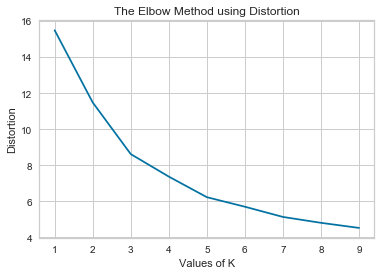

In [166]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

1 : 56774.76855455054
2 : 28883.09113606296
3 : 17807.084185049745
4 : 11548.892110261968
5 : 8866.329542370811
6 : 6855.209674862663
7 : 5518.184507284203
8 : 4479.806628639945
9 : 3958.5830864524373


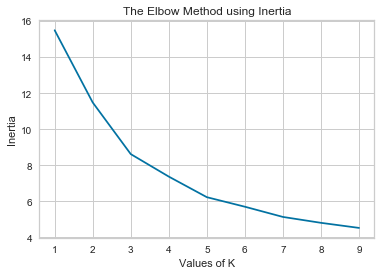

In [167]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

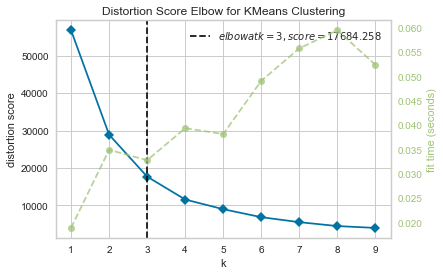

In [168]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(aa_2017)        
visualizer.show()

FOR 2019

In [169]:
from scipy.spatial.distance import cdist 

X = aa_1990
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

1 : 15.151820292056218
2 : 10.701604777961293
3 : 9.153600962849081
4 : 7.375407458889752
5 : 6.587144107815438
6 : 6.057399393717735
7 : 5.270936846164026
8 : 4.778843914463596
9 : 4.387420193490759


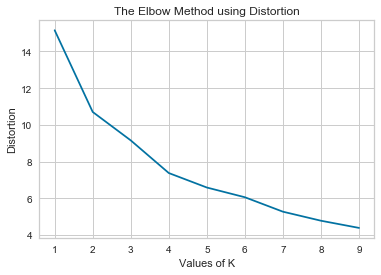

In [170]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

1 : 41745.52340186676
2 : 21888.995068778368
3 : 13433.020450409142
4 : 9148.253774227673
5 : 7063.629840363528
6 : 5743.317811489322
7 : 4497.410589034378
8 : 3529.8841195545933
9 : 2974.654942634319


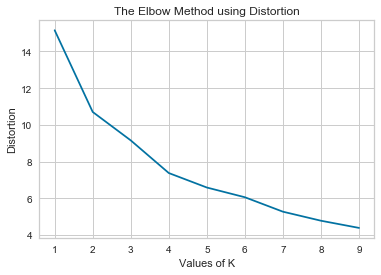

In [171]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

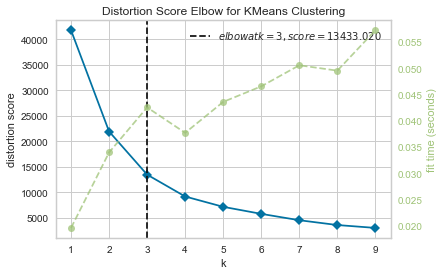

In [172]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(aa_1990)        
visualizer.show()

# Clustering the different years with countries

1990 with 3 clusters

[[22.33363728 11.81414025]
 [11.14185421 30.84569773]
 [59.14937418  5.60055988]]


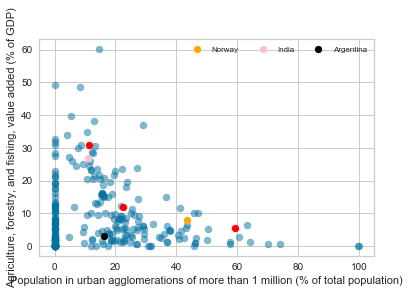

In [173]:
countries_df = final_df_1990.loc[final_df_1990['Country Code'].isin(['NOR','IND','ARG'])]
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(aa_1990)
centroids = kmeans.cluster_centers_

print(centroids)
import itertools
colors = itertools.cycle(["r", "b", "g"])

plt.scatter(aa['Population in urban agglomerations of more than 1 million (% of total population)'], aa['Agriculture, forestry, and fishing, value added (% of GDP)'], s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel("Population in urban agglomerations of more than 1 million (% of total population)")
plt.ylabel("Agriculture, forestry, and fishing, value added (% of GDP)")

nor = plt.scatter(countries_df.iloc[0]['Population in urban agglomerations of more than 1 million (% of total population)'],countries_df.iloc[0]['Agriculture, forestry, and fishing, value added (% of GDP)'], color="orange")
ind = plt.scatter(countries_df.iloc[1]['Population in urban agglomerations of more than 1 million (% of total population)'],countries_df.iloc[1]['Agriculture, forestry, and fishing, value added (% of GDP)'], color="pink")
arg = plt.scatter(countries_df.iloc[2]['Population in urban agglomerations of more than 1 million (% of total population)'],countries_df.iloc[2]['Agriculture, forestry, and fishing, value added (% of GDP)'], color="black")

plt.legend((nor, ind, arg),
           ('Norway', 'India', 'Argentina'),
           scatterpoints=1,
           loc='best',
           ncol=3,
           fontsize=8)
plt.show()



2017 with 4 clusters

[[19.85197138  7.45374702]
 [40.92176881  4.88215773]
 [71.89130906  1.51825295]
 [13.08745001 27.90625778]]


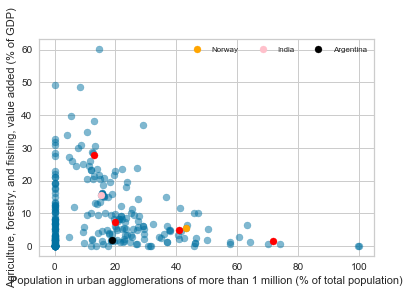

In [174]:
countries_df = final_df_2017.loc[final_df_2017['Country Code'].isin(['NOR','IND','ARG'])]
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(aa_2017)
centroids = kmeans.cluster_centers_

print(centroids)
import itertools
colors = itertools.cycle(["r", "b", "g"])

plt.scatter(aa['Population in urban agglomerations of more than 1 million (% of total population)'], aa['Agriculture, forestry, and fishing, value added (% of GDP)'], s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel("Population in urban agglomerations of more than 1 million (% of total population)")
plt.ylabel("Agriculture, forestry, and fishing, value added (% of GDP)")

nor = plt.scatter(countries_df.iloc[0]['Population in urban agglomerations of more than 1 million (% of total population)'],countries_df.iloc[0]['Agriculture, forestry, and fishing, value added (% of GDP)'], color="orange")
ind = plt.scatter(countries_df.iloc[1]['Population in urban agglomerations of more than 1 million (% of total population)'],countries_df.iloc[1]['Agriculture, forestry, and fishing, value added (% of GDP)'], color="pink")
arg = plt.scatter(countries_df.iloc[2]['Population in urban agglomerations of more than 1 million (% of total population)'],countries_df.iloc[2]['Agriculture, forestry, and fishing, value added (% of GDP)'], color="black")

plt.legend((nor, ind, arg),
           ('Norway', 'India', 'Argentina'),
           scatterpoints=1,
           loc='best',
           ncol=3,
           fontsize=8)
plt.show()

2017 with 3 Clusters

[[14.10402409 23.6394008 ]
 [23.01728754  5.34715425]
 [55.31013616  3.54716573]]


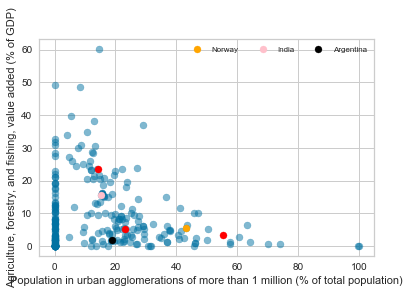

In [175]:
countries_df = final_df_2017.loc[final_df_2017['Country Code'].isin(['NOR','IND','ARG'])]
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(aa_2017)
centroids = kmeans.cluster_centers_

print(centroids)
import itertools
colors = itertools.cycle(["r", "b", "g"])

plt.scatter(aa['Population in urban agglomerations of more than 1 million (% of total population)'], aa['Agriculture, forestry, and fishing, value added (% of GDP)'], s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel("Population in urban agglomerations of more than 1 million (% of total population)")
plt.ylabel("Agriculture, forestry, and fishing, value added (% of GDP)")

nor = plt.scatter(countries_df.iloc[0]['Population in urban agglomerations of more than 1 million (% of total population)'],countries_df.iloc[0]['Agriculture, forestry, and fishing, value added (% of GDP)'], color="orange")
ind = plt.scatter(countries_df.iloc[1]['Population in urban agglomerations of more than 1 million (% of total population)'],countries_df.iloc[1]['Agriculture, forestry, and fishing, value added (% of GDP)'], color="pink")
arg = plt.scatter(countries_df.iloc[2]['Population in urban agglomerations of more than 1 million (% of total population)'],countries_df.iloc[2]['Agriculture, forestry, and fishing, value added (% of GDP)'], color="black")

plt.legend((nor, ind, arg),
           ('Norway', 'India', 'Argentina'),
           scatterpoints=1,
           loc='best',
           ncol=3,
           fontsize=8)
plt.show()